In [46]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style("darkgrid")

In [47]:
x = np.loadtxt("./output/x.txt")
y = np.loadtxt("./output/y.txt")
u = np.loadtxt("./output/u.txt")
v = np.loadtxt("./output/v.txt")
rho = np.loadtxt("./output/rho.txt")
errors = np.loadtxt("./output/errors.txt")
nx = len(x)
ny = len(y)

solid = np.loadtxt("./output/solid_points.txt")
xs = solid[:, 0]
ys = solid[:, 1]

internal = np.loadtxt("./output/internal_points.txt")
xi = internal[:, 0]
yi = internal[:, 1]

L = 2.2
H = 0.41

dx = 1/500
i0 = 100
j0 = 100

x.shape, y.shape, u.shape, v.shape, rho.shape, errors.shape

((1101,), (206,), (1101, 206), (1101, 206), (1101, 206), (29594,))

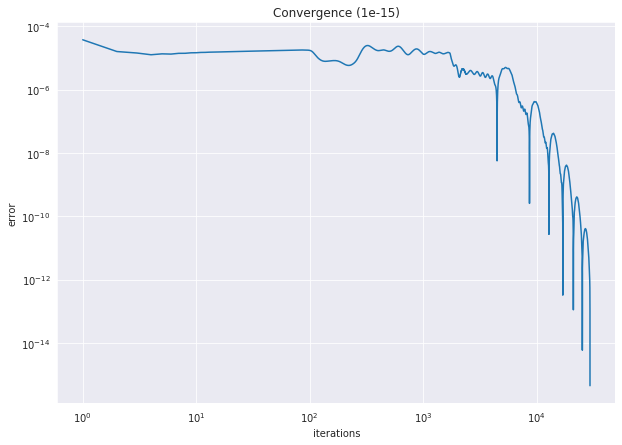

In [88]:
plt.figure(figsize=(10, 7))
sns.lineplot(range(1, len(errors)+1), errors)
plt.xscale("log")
plt.yscale("log")
plt.xlabel("iterations")
plt.ylabel("error")
plt.title("Convergence (1e-15)")

plt.show()

In [89]:
np.mean(rho), np.std(rho)

(1.2855373085368111, 0.12161989838093638)

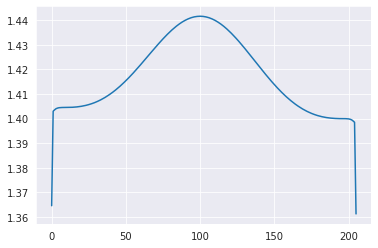

In [90]:
plt.plot(rho[0])

In [91]:
P = (rho/np.mean(rho[:, :]))*((0.2/0.15)**2)/3

P[min(xs).astype(int), j0] - P[max(xs).astype(int), j0]

0.13327069024503424

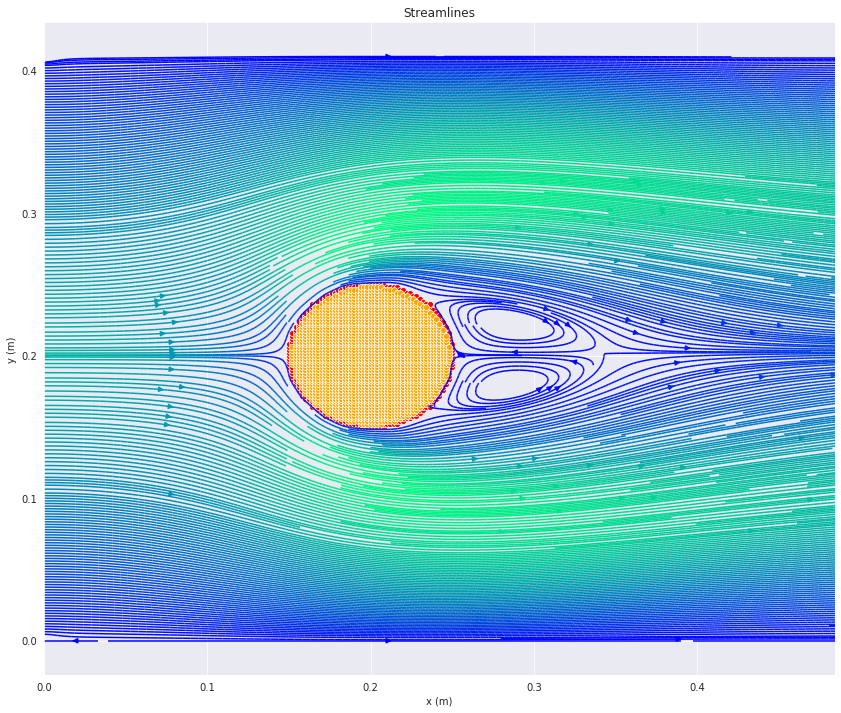

In [92]:
cutoff = 0.22
h = 12
ar = L/H

plt.figure(figsize=(h*ar*cutoff, h))
plt.streamplot(x, y, u.T, v.T, density=15, color=np.sqrt(u.T*u.T + v.T*v.T), cmap='winter')
plt.xlabel("x (m)")
plt.ylabel("y (m)")
plt.title("Streamlines")

sns.scatterplot(dx*np.array(xs), dx*np.array(ys), color='r')
sns.scatterplot(dx*np.array(xi), dx*np.array(yi), color='orange')

plt.xlim([min(x), cutoff*max(x)])

plt.show()

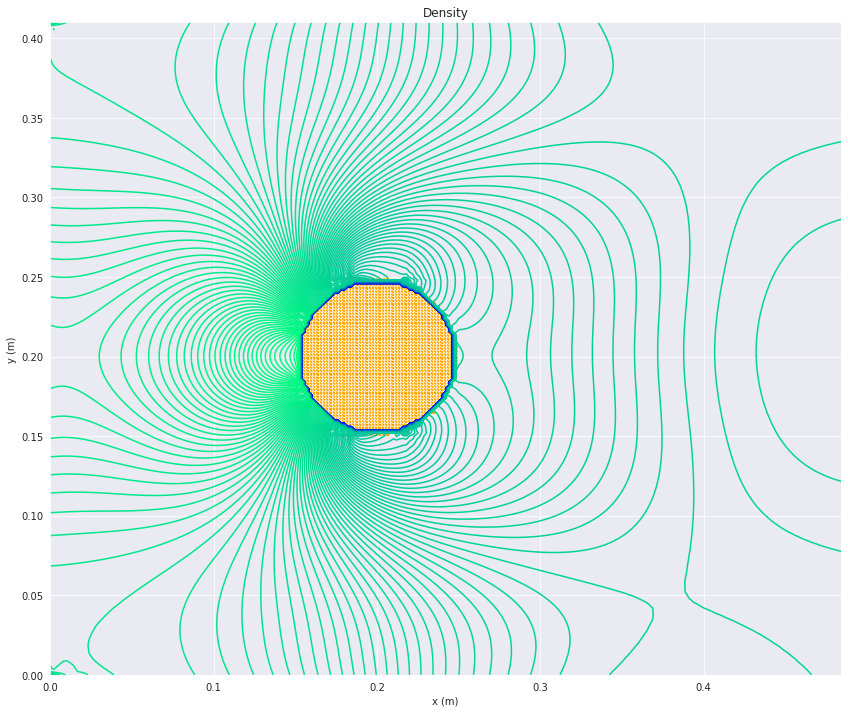

In [94]:
X, Y = np.meshgrid(x, y)

cutoff = 0.22
scale = 1

plt.figure(figsize=(h*ar*cutoff, h))
plt.contour(X.T, Y.T, scale*rho, np.arange(scale*np.min(rho), scale*np.max(rho), 0.004), cmap="winter")
plt.xlabel("x (m)")
plt.ylabel("y (m)")
plt.title("Density")

sns.scatterplot(dx*np.array(xi), dx*np.array(yi), color='orange')

plt.xlim([min(x), cutoff*max(x)])
plt.show()